Original Data_type is <dtype: 'float32'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'float32'>
Image Size is (1, 613, 304, 1)
Image min and max are (12.0, 255.0)
Image read successfully for Part B.
(1, 24, 23, 1)


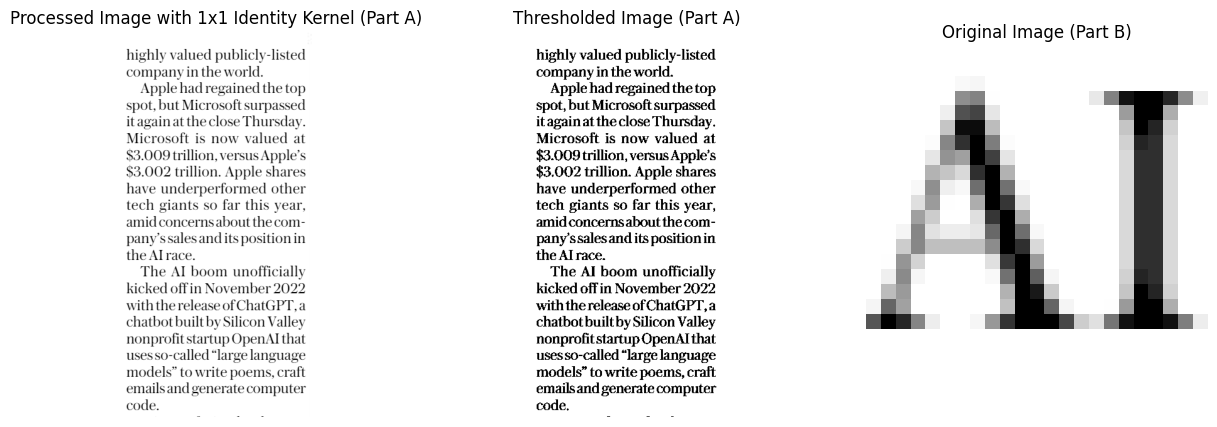

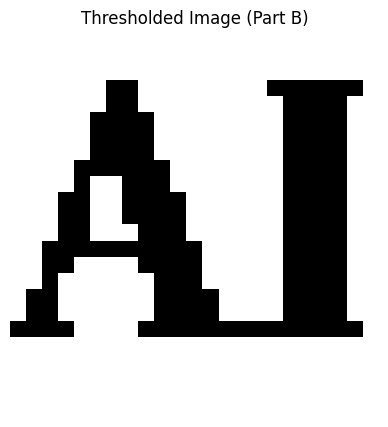

Images read successfully for Part C.
Image Size for Part C is (1, 613, 304, 1)
Threshold Value for Part C is tf.Tensor(30373792.0, shape=(), dtype=float32)


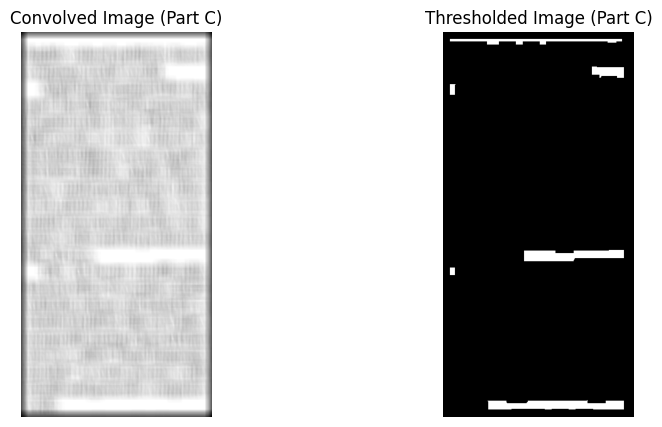

Images read successfully for Part e.
Image Size for Part e is (1, 1, 613, 304, 1, 1)


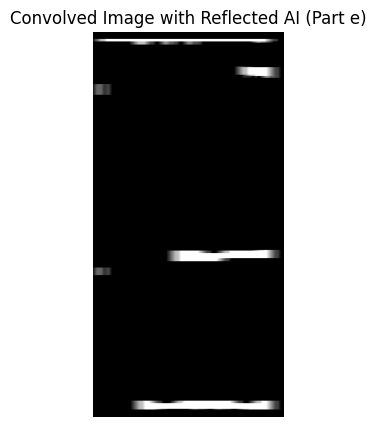

In [ ]:
  import tensorflow as tf
  import matplotlib.pyplot as plt
  import cv2 as cv

  threshold_value = 228

  # Part A - Process 'news-msr-2.png'
  img_path_a = '/content/news-msr-2.png'
  img0_a = cv.imread(img_path_a)
  img_a = cv.cvtColor(img0_a, cv.COLOR_BGR2GRAY)

  img_a = tf.convert_to_tensor(img_a, dtype=tf.uint8)

  kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)

  img_a = tf.cast(img_a, tf.float32)
  img_a = tf.nn.conv2d(tf.reshape(img_a, (1, img_a.shape[0], img_a.shape[1], 1)),
                      tf.reshape(kernel_sz1, (1, 1, 1, 1)),
                      strides=[1, 1, 1, 1],
                      padding='SAME')

  img_a_thresholded = tf.where(img_a <= threshold_value, 0, 255)

  print('Original Data_type is', img_a.dtype)
  print('Kernel_sz1 =', kernel_sz1)
  print('Data_type is', img_a.dtype)
  print('Image Size is', img_a.shape)
  print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a), tf.reduce_max(img_a)))

  plt.figure(figsize=(15, 5))
  plt.subplot(1, 3, 1)
  plt.imshow(tf.squeeze(img_a), cmap='gray')
  plt.title('Processed Image with 1x1 Identity Kernel (Part A)')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(tf.squeeze(img_a_thresholded), cmap='gray')
  plt.title('Thresholded Image (Part A)')
  plt.axis('off')

  # Part B - Process 'AI.png'
  img_path_b = '/content/AI.png'
  img0_b = cv.imread(img_path_b)

  if img0_b is not None:
      print('Image read successfully for Part B.')
      img_b = cv.cvtColor(img0_b, cv.COLOR_BGR2GRAY)

      img_b = tf.convert_to_tensor(img_b, dtype=tf.uint8)

      plt.subplot(1, 3, 3)
      plt.imshow(tf.squeeze(img_b), cmap='gray')
      plt.title('Original Image (Part B)')
      plt.axis('off')

      img_b = tf.cast(img_b, tf.float32)
      img_b = tf.nn.conv2d(tf.reshape(img_b, (1, img_b.shape[0], img_b.shape[1], 1)),
                          tf.reshape(kernel_sz1, (1, 1, 1, 1)),
                          strides=[1, 1, 1, 1],
                          padding='SAME')

      img_b_thresholded = tf.where(img_b <= threshold_value, 0, 255)

      print(img_b.shape)

      plt.figure(figsize=(5, 5))
      plt.imshow(tf.squeeze(img_b_thresholded), cmap='gray')
      plt.title('Thresholded Image (Part B)')
      plt.axis('off')

      plt.show()
  else:
      print('Error: Image not loaded for Part B.')
      # Part C - Convolve 'news-msr-2' with 'AI' and threshold the output
if img0_a is not None and img0_b is not None:
    print('Images read successfully for Part C.')

    img_c_a = cv.cvtColor(img0_a, cv.COLOR_BGR2GRAY)

    img_c_b = cv.cvtColor(img0_b, cv.COLOR_BGR2GRAY)

    img_c_a = tf.convert_to_tensor(img_c_a, dtype=tf.uint8)
    img_c_b = tf.convert_to_tensor(img_c_b, dtype=tf.uint8)

    img_c_a = tf.cast(img_c_a, tf.float32)
    img_c_b = tf.cast(img_c_b, tf.float32)

    img_c_a = tf.reshape(img_c_a, (1, img_c_a.shape[0], img_c_a.shape[1], 1))
    img_c_b = tf.reshape(img_c_b, (img_c_b.shape[0], img_c_b.shape[1], 1, 1))

    img_c_convolved = tf.nn.conv2d(img_c_a, img_c_b, strides=[1, 1, 1, 1], padding='SAME')

    threshold_c_value = tf.reduce_max(img_c_convolved) - 25
    img_c_thresholded = tf.where(img_c_convolved <= threshold_c_value, 0, 255)

    print('Image Size for Part C is', img_c_convolved.shape)
    print('Threshold Value for Part C is', threshold_c_value)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(tf.squeeze(img_c_convolved), cmap='gray')
    plt.title('Convolved Image (Part C)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(tf.squeeze(img_c_thresholded), cmap='gray')
    plt.title('Thresholded Image (Part C)')
    plt.axis('off')

    plt.show()

else:
    print('Error: Images not loaded for Part C.')


# Part e - Convolve the output with the reflection of 'AI' (around origin)
if img0_a is not None and img0_b is not None:
    print('Images read successfully for Part e.')

    img_c_b_reflected = tf.reverse(img_c_b, axis=[0, 1])

    img_c_thresholded_with_channel = tf.reshape(tf.cast(img_c_thresholded, tf.float32), (1, *img_c_thresholded.shape, 1))

    img_c_reflected_convolved = tf.nn.conv2d(img_c_thresholded_with_channel, img_c_b_reflected, strides=[1, 1, 1, 1], padding='SAME')

    print('Image Size for Part e is', img_c_reflected_convolved.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(tf.squeeze(img_c_reflected_convolved), cmap='gray')
    plt.title('Convolved Image with Reflected AI (Part e)')
    plt.axis('off')

    plt.show()

else:
    print('Error: Images not loaded for Part e.')

